# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Who:**  
- NFL Coaches & Medical Staff – Identify injury patterns and develop player safety strategies.  
- Sports Analysts & Journalists – Report on injury trends and their impact on the game.  
- NFL Fans & Advocacy Groups – Understand player safety concerns, especially regarding concussions.  

**What:**  
- Which positions are most at risk for concussions.  
- The trend of concussions across different seasons.  
- The impact of concussions on player availability (e.g., games missed, weeks injured).  
- Whether certain teams or seasons show a higher frequency of concussions.  

**How:**  
- Stacked bar chart to show concussion injuries by position.  
- Line graph to illustrate concussion trends over multiple seasons.  
- Heatmap to compare teams with the highest concussion incidents.  
- Annotations to highlight key insights (e.g., spikes in concussions for certain positions or seasons).  
- Brief narrative connecting findings to broader concerns about player safety and rule changes in the NFL.  


# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
import pandas as pd

file_path = '/Users/chrismckee/Downloads/nfl_concussion_injuries_2012_2014.xls'

nfl_df = pd.read_csv(file_path)

nfl_df.head()

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


In [4]:
nfl_df.describe()

,Week of Injury,Weeks Injured,Games Missed,Total Snaps
count,392.000000,392.000000,361.000000,392.000000
mean,8.548469,0.920918,0.925208,32.038265
std,5.004111,0.270211,1.742429,22.228552
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,14.000000
50%,9.000000,1.000000,0.000000,29.000000
75%,13.000000,1.000000,1.000000,48.000000
max,19.000000,1.000000,14.000000,93.000000


In [5]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              392 non-null    object 
 1   Player                          392 non-null    object 
 2   Team                            392 non-null    object 
 3   Game                            392 non-null    object 
 4   Date                            392 non-null    object 
 5   Opposing Team                   392 non-null    object 
 6   Position                        392 non-null    object 
 7   Pre-Season Injury?              392 non-null    object 
 8   Winning Team?                   392 non-null    object 
 9   Week of Injury                  392 non-null    int64  
 10  Season                          392 non-null    object 
 11  Weeks Injured                   392 non-null    int64  
 12  Games Missed                    361 

In [6]:
duplicates = nfl_df[nfl_df.duplicated()]
duplicates

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury


In [7]:
duplicates_all_cols = nfl_df[nfl_df.duplicated(subset=nfl_df.columns.tolist())]
duplicates_all_cols

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury


In [8]:
mean_vals = nfl_df.mean(numeric_only=True)
mean_vals

median_vals = nfl_df.median(numeric_only=True)
median_vals

mode_vals = nfl_df.mode().iloc[0]
mode_vals

print(mean_vals)
print(median_vals)
print(mode_vals)

Week of Injury     8.548469
Weeks Injured      0.920918
Games Missed       0.925208
Total Snaps       32.038265
dtype: float64
Week of Injury     9.0
Weeks Injured      1.0
Games Missed       0.0
Total Snaps       29.0
dtype: float64
ID                                A.J. Jefferson - Minnesota Vikings vs. Chicago...
Player                                                                   Alex Smith
Team                                                             Cincinnati Bengals
Game                              Cincinnati Bengals vs. Baltimore Ravens (7/9/2...
Date                                                                      2/12/2012
Opposing Team                                                         Chicago Bears
Position                                                                  Comerback
Pre-Season Injury?                                                               No
Winning Team?                                                                    No
Week of In

In [9]:
missing_vals = nfl_df.isnull().sum()
missing_vals

ID                                 0
Player                             0
Team                               0
Game                               0
Date                               0
Opposing Team                      0
Position                           0
Pre-Season Injury?                 0
Winning Team?                      0
Week of Injury                     0
Season                             0
Weeks Injured                      0
Games Missed                      31
Unknown Injury?                    0
Reported Injury Type               3
Total Snaps                        0
Play Time After Injury            43
Average Playtime Before Injury    51
dtype: int64

In [10]:
nfl_df[nfl_df["Games Missed"].isnull()].head(10)

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN
5,Austin Collie - Chicago Bears vs. Indianapolis...,Austin Collie,Indianapolis Colts,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Chicago Bears,Wide Receiver,Yes,No,1,2012/2013,0,NaN,No,Head,0,NaN,NaN
6,Ramon Harewood - Houston Texans vs. Baltimore ...,Ramon Harewood,Baltimore Ravens,Houston Texans vs. Baltimore Ravens (21/10/2012),21/10/2012,Houston Texans,Offensive Tackle,No,No,7,2012/2013,0,NaN,Yes,Head,0,NaN,NaN
7,James Carpenter - Seattle Seahawks vs. Minneso...,James Carpenter,Seattle Seahawks,Seattle Seahawks vs. Minnesota Vikings (4/11/2...,4/11/2012,Minnesota Vikings,Guard,No,Yes,9,2012/2013,0,NaN,Yes,Illness,0,NaN,NaN
8,David Reed - Indianapolis Colts vs. Oakland Ra...,David Reed,Indianapolis Colts,Indianapolis Colts vs. Oakland Raiders (8/9/2013),8/09/2013,Oakland Raiders,Wide Receiver,Yes,Yes,1,2013/2014,0,NaN,No,Concussion,0,14 downs,NaN
9,Brandon Ghee - Chicago Bears vs. Cincinnati Be...,Brandon Ghee,Cincinnati Bengals,Chicago Bears vs. Cincinnati Bengals (8/9/2013),8/09/2013,Chicago Bears,Comerback,Yes,No,1,2013/2014,0,NaN,No,Concussion,0,37 downs,NaN
10,Pat Angerer - Indianapolis Colts vs. Oakland R...,Pat Angerer,Indianapolis Colts,Indianapolis Colts vs. Oakland Raiders (8/9/2013),8/09/2013,Oakland Raiders,Linebacker,Yes,Yes,1,2013/2014,0,NaN,No,Concussion,0,NaN,NaN
11,Darryl Sharpton - Houston Texans vs. San Diego...,Darryl Sharpton,Houston Texans,Houston Texans vs. San Diego Chargers (9/9/2013),9/09/2013,San Diego Chargers,Linebacker,Yes,Yes,1,2013/2014,0,NaN,No,Concussion,0,NaN,NaN
12,Demetri Goodson - Seattle Seahawks vs. Green B...,Demetri Goodson,Green Bay Packers,Seattle Seahawks vs. Green Bay Packers (4/9/2014),4/09/2014,Seattle Seahawks,Comerback,Yes,No,1,2014/2015,0,NaN,No,Concussion,0,2 downs,NaN
13,James Wright - Cincinnati Bengals vs. Baltimor...,James Wright,Cincinnati Bengals,Cincinnati Bengals vs. Baltimore Ravens (7/9/2...,7/09/2014,Baltimore Ravens,Wide Receiver,Yes,Yes,1,2014/2015,0,NaN,No,Concussion,0,NaN,NaN


In [11]:
# df_negative = nfl_df[nfl_df["Games Missed"] < 0]
# print(df_negative)

nfl_df.head()


,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


In [12]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(nfl_df, drop_first=True)

# Display the transformed dataframe
print(df_encoded.head())

   Week of Injury  Weeks Injured  Games Missed  Total Snaps  \
0               4              1           1.0            0   
1               3              1           1.0            0   
2               4              1           1.0            0   
3               6              1           1.0            0   
4               1              0           NaN            0   

   ID_A.J. Jenkins - Tennessee Titans vs. Kansas City Chiefs (7/9/2014)  \
0                                              False                      
1                                              False                      
2                                              False                      
3                                              False                      
4                                              False                      

   ID_Aaron Williams - Buffalo Bills vs. Chicago Bears (7/9/2014)  \
0                                              False                
1                               

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

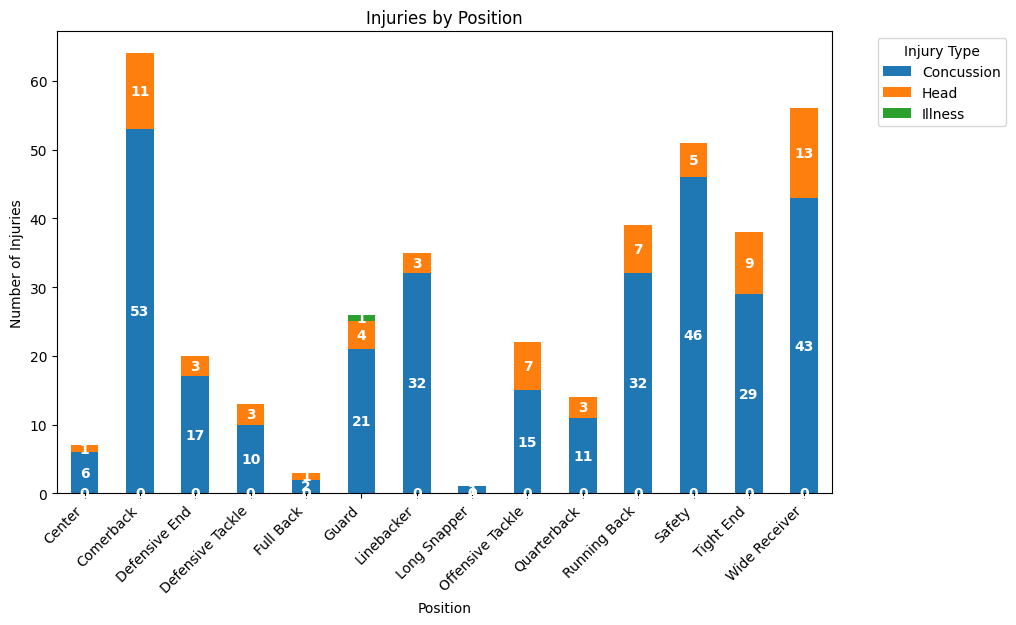

In [13]:
import matplotlib.pyplot as plt

injuries_by_position = nfl_df.groupby("Position")["Reported Injury Type"].value_counts().unstack(fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = injuries_by_position.plot(kind="bar", stacked=True, ax=ax)

# Formatting
plt.xlabel("Position")
plt.ylabel("Number of Injuries")
plt.title("Injuries by Position")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Injury Type", bbox_to_anchor=(1.05, 1), loc="upper left")

for container in bars.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=10, color="white", weight="bold")

# Show the plot
plt.show()

### Finding new data are original dataset wasn't that great on its own ###

In [27]:
import pandas as pd
import glob

# Define file paths
base_path = "/Users/chrismckee/Downloads/"

# Load datasets with full paths
games = pd.read_csv(base_path + "nflbigdatabowl_games.csv")
plays = pd.read_csv(base_path + "nflbigdatabowl_plays.csv")
players = pd.read_csv(base_path + "nflbigdatabowl_players.csv")
pff_scouting = pd.read_csv(base_path + "nflbigdatabowl_pffScoutingData.csv")

# Load all tracking data files
tracking_files = glob.glob(base_path + "nflbigdatabowl_week*.csv")  # Finds all weekly tracking data files
tracking_data = pd.concat([pd.read_csv(f) for f in tracking_files], ignore_index=True)

# Merge games with plays (game-level details added to each play)
merged_df = plays.merge(games, on="gameId", how="left")

# Merge scouting data (player-level scouting information)
merged_df = merged_df.merge(pff_scouting, on=["gameId", "playId"], how="left")

# Merge player data (biographical details)
merged_df = merged_df.merge(players, on="nflId", how="left")

# Merge tracking data (player movement per play)
merged_df = merged_df.merge(tracking_data, on=["gameId", "playId", "nflId"], how="left")

# # Save merged dataframe
# merged_df.to_csv(base_path + "merged_nflbigdatabowl_data.csv", index=False)

# Check merged dataframe
print(merged_df.head())


       gameId  playId                                    playDescription  \
0  2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
1  2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
2  2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
3  2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
4  2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   

   quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
0        1     3          2             TB           DAL           TB   
1        1     3          2             TB           DAL           TB   
2        1     3          2             TB           DAL           TB   
3        1     3          2             TB           DAL           TB   
4        1     3          2             TB           DAL           TB   

   yardlineNumber  ... team  playDirection      x      y     s     a   dis  \
0              33  ...   T

In [28]:
# Display basic information
df_info = merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205874 entries, 0 to 2205873
Data columns (total 70 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   gameId                  int64  
 1   playId                  int64  
 2   playDescription         object 
 3   quarter                 int64  
 4   down                    int64  
 5   yardsToGo               int64  
 6   possessionTeam          object 
 7   defensiveTeam           object 
 8   yardlineSide            object 
 9   yardlineNumber          int64  
 10  gameClock               object 
 11  preSnapHomeScore        int64  
 12  preSnapVisitorScore     int64  
 13  passResult              object 
 14  penaltyYards            float64
 15  prePenaltyPlayResult    int64  
 16  playResult              int64  
 17  foulName1               object 
 18  foulNFLId1              float64
 19  foulName2               object 
 20  foulNFLId2              float64
 21  foulName3               object 

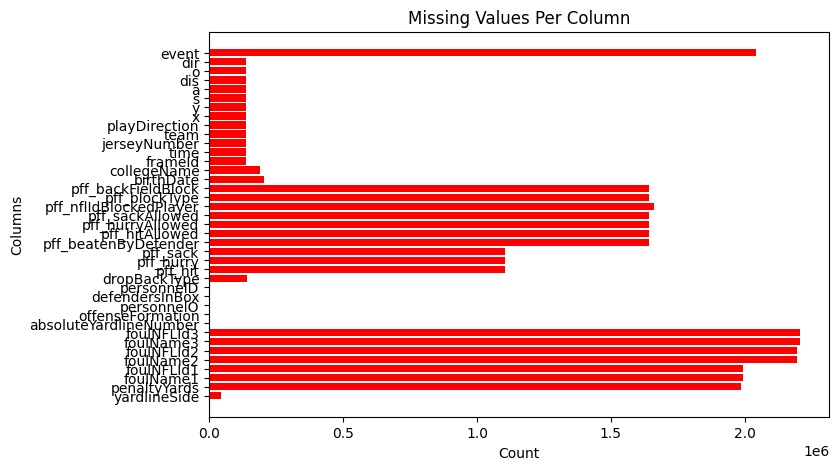

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing values
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values as a bar chart
plt.figure(figsize=(8, 5))
plt.barh(missing_values.index, missing_values.values, color="red")
plt.title("Missing Values Per Column")
plt.xlabel("Count")
plt.ylabel("Columns")
plt.show()


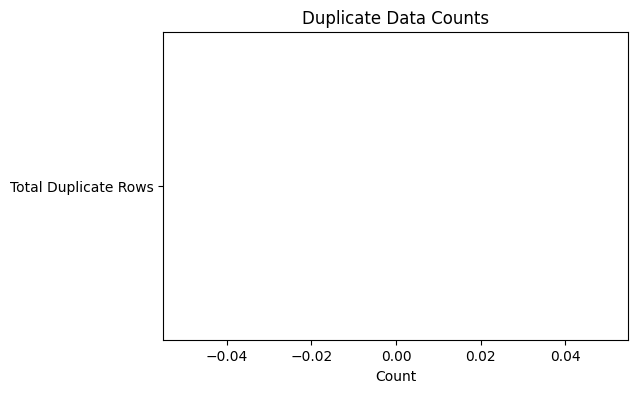

In [30]:
import matplotlib.pyplot as plt

# Calculate duplicate counts
duplicate_rows = merged_df.duplicated().sum()

# Plot duplicate summary
plt.figure(figsize=(6, 4))
plt.barh(["Total Duplicate Rows"], [duplicate_rows], color="blue")
plt.title("Duplicate Data Counts")
plt.xlabel("Count")
plt.show()


<Figure size 1400x600 with 0 Axes>

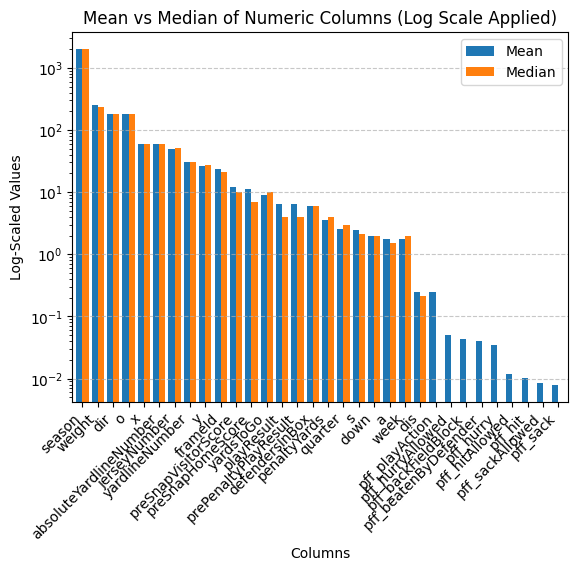

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exclude ID and extreme high-value columns
excluded_columns = ["gameId", "playId", "nflId", "foulNFLId1", "foulNFLId2", "foulNFLId3", "pff_nflIdBlockedPlayer"]
numeric_cols = merged_df.select_dtypes(include=["number"]).drop(columns=excluded_columns, errors="ignore")

# Calculate summary statistics
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()

# Create summary dataframe
summary_statistics = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values
})

# Sort by mean to organize bars
summary_statistics = summary_statistics.sort_values(by="Mean", ascending=False)

# Plot with larger figure size
plt.figure(figsize=(14, 6))
ax = summary_statistics.plot(kind="bar", width=0.8)

# Apply log scale for better visibility
ax.set_yscale("log")

# Improve readability
plt.title("Mean vs Median of Numeric Columns (Log Scale Applied)")
plt.xlabel("Columns")
plt.ylabel("Log-Scaled Values")
plt.xticks(rotation=45, ha="right")  # Rotate x labels for better alignment
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for readability

plt.show()


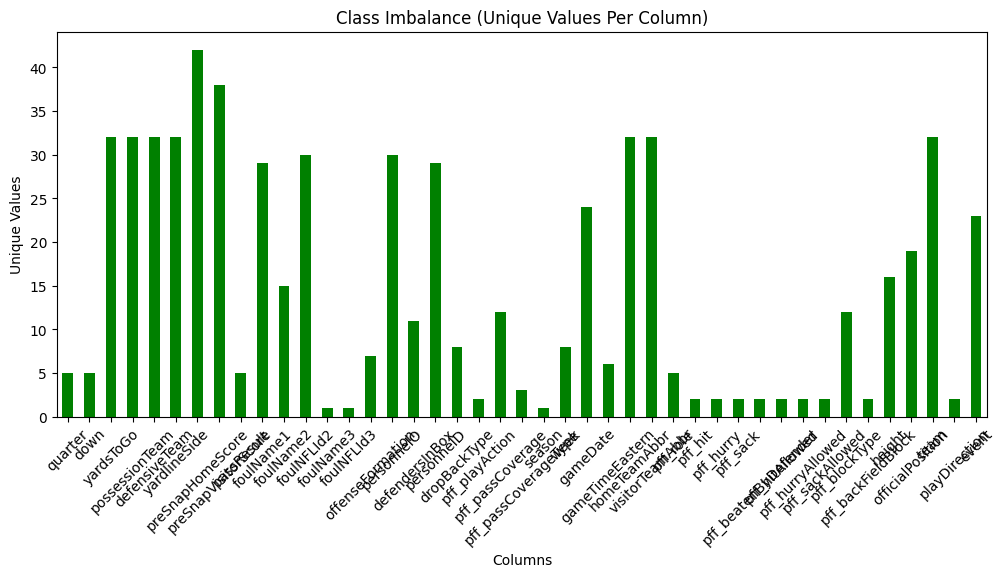

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify class imbalance (columns with <50 unique values)
class_imbalance = merged_df.nunique()
filtered_imbalance = class_imbalance[class_imbalance < 50]

# Plot class imbalance
plt.figure(figsize=(12, 5))
filtered_imbalance.plot(kind="bar", color="green")
plt.title("Class Imbalance (Unique Values Per Column)")
plt.xlabel("Columns")
plt.ylabel("Unique Values")
plt.xticks(rotation=45)
plt.show()


In [48]:
print(merged_df.columns)


Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3',
       'absoluteYardlineNumber', 'offenseFormation', 'personnelO',
       'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction',
       'pff_passCoverage', 'pff_passCoverageType', 'season', 'week',
       'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr',
       'nflId', 'pff_role', 'pff_positionLinedUp', 'pff_hit', 'pff_hurry',
       'pff_sack', 'pff_beatenByDefender', 'pff_hitAllowed',
       'pff_hurryAllowed', 'pff_sackAllowed', 'pff_nflIdBlockedPlayer',
       'pff_blockType', 'pff_backFieldBlock', 'height', 'weight', 'birthDate',
       'collegeName', 'officialPosition', 'displayN

In [39]:
concussion_df = merged_df[merged_df["playDescription"].str.contains("concussion", case=False, na=False)]

print(concussion_df)


             gameId  playId  \
2136552  2021101012    2492   
2136553  2021101012    2492   
2136554  2021101012    2492   
2136555  2021101012    2492   
2136556  2021101012    2492   
2136557  2021101012    2492   
2136558  2021101012    2492   
2136559  2021101012    2492   
2136560  2021101012    2492   
2136561  2021101012    2492   
2136562  2021101012    2492   
2136563  2021101012    2492   
2136564  2021101012    2492   
2136565  2021101012    2492   
2136566  2021101012    2492   
2136567  2021101012    2492   
2136568  2021101012    2492   
2136569  2021101012    2492   
2136570  2021101012    2492   
2136571  2021101012    2492   
2136572  2021101012    2492   
2136573  2021101012    2492   

                                           playDescription  quarter  down  \
2136552  (10:10) (Shotgun) D.Prescott pass incomplete d...        3     2   
2136553  (10:10) (Shotgun) D.Prescott pass incomplete d...        3     2   
2136554  (10:10) (Shotgun) D.Prescott pass incomplete d

In [40]:
concussion_play = merged_df[merged_df["playId"] == 2492]
export_path = "/Users/chrismckee/Downloads/concussion_play_2492.csv"
concussion_play.to_csv(export_path, index=False)
print(f"File saved: {export_path}")

File saved: /Users/chrismckee/Downloads/concussion_play_2492.csv


In [41]:
# one row per unique injury
injury_updates = merged_df.drop_duplicates(subset=["gameId", "playId", "playDescription"])


In [43]:
# Filter for plays where "concussion" is mentioned in the play description
concussion_plays = merged_df[merged_df["playDescription"].str.contains("concussion", case=False, na=False)]

# Get a unique list of (gameId, playId) pairs
unique_concussion_plays = concussion_plays[["gameId", "playId"]].drop_duplicates()

# Display the unique game/play ID pairs
print(unique_concussion_plays)


             gameId  playId
2136552  2021101012    2492


In [46]:
# Filter the dataset for the specific concussion play with gameId 2021101012 and playId 2492
specific_concussion_play = merged_df[(merged_df["gameId"] == 2021101012) & (merged_df["playId"] == 2492)]

# Display all the data for this specific play
print(specific_concussion_play)

export_path = "/Users/chrismckee/Downloads/specific_concussion_play_2492.csv"
specific_concussion_play.to_csv(export_path, index=False)
print(f"File saved: {export_path}")


             gameId  playId  \
2136552  2021101012    2492   
2136553  2021101012    2492   
2136554  2021101012    2492   
2136555  2021101012    2492   
2136556  2021101012    2492   
2136557  2021101012    2492   
2136558  2021101012    2492   
2136559  2021101012    2492   
2136560  2021101012    2492   
2136561  2021101012    2492   
2136562  2021101012    2492   
2136563  2021101012    2492   
2136564  2021101012    2492   
2136565  2021101012    2492   
2136566  2021101012    2492   
2136567  2021101012    2492   
2136568  2021101012    2492   
2136569  2021101012    2492   
2136570  2021101012    2492   
2136571  2021101012    2492   
2136572  2021101012    2492   
2136573  2021101012    2492   

                                           playDescription  quarter  down  \
2136552  (10:10) (Shotgun) D.Prescott pass incomplete d...        3     2   
2136553  (10:10) (Shotgun) D.Prescott pass incomplete d...        3     2   
2136554  (10:10) (Shotgun) D.Prescott pass incomplete d

In [49]:
# Check for injury-related keywords in the playDescription column
injury_keywords = ["concussion", "injury", "knee", "ankle", "shoulder", "head", "fracture", "ACL", "MCL", "sprain", "tear"]

# Create a filter that looks for any of these words in the playDescription column
injury_plays = merged_df[merged_df["playDescription"].str.contains('|'.join(injury_keywords), case=False, na=False)]

# Count the number of unique injury-related plays
num_injury_plays = injury_plays[["gameId", "playId"]].drop_duplicates().shape[0]

# Print the count of unique plays where an injury is mentioned
print(f"Total unique injury-related plays: {num_injury_plays}")

# Display the first few injury-related plays for review
print("\nSample Injury-Related Plays:")
print(injury_plays[["gameId", "playId", "playDescription"]].drop_duplicates().head(10))


Total unique injury-related plays: 128

Sample Injury-Related Plays:
             gameId  playId                                    playDescription
463694   2021091205    1518  (8:15) (Shotgun) Ty.Taylor pass incomplete sho...
665742   2021091208    2123  (:25) (No Huddle, Shotgun) T.Heinicke pass inc...
671814   2021091208    2428  (12:46) (Shotgun) T.Heinicke pass short left t...
672496   2021091208    2482  (11:41) (Shotgun) T.Heinicke pass deep left to...
681802   2021091208    3166  (1:36) (Shotgun) T.Heinicke pass short left to...
1078506  2021091600     590  (5:57) (Shotgun) D.Jones pass incomplete short...
1081388  2021091600     839  (1:10) (Shotgun) T.Heinicke pass short middle ...
1082070  2021091600     884  (:08) (No Huddle, Shotgun) T.Heinicke pass sho...
1083742  2021091600    1037  (12:04) T.Heinicke pass deep left to T.McLauri...
1084710  2021091600    1061  (11:22) (Shotgun) T.Heinicke pass short middle...


That combination of files only shows one instance of a concussion. While it will be useful for overall comparison of other injuries, I'm going to look in other files for more concussions.

In [50]:
import pandas as pd

# Define file paths
base_path = "/Users/chrismckee/Downloads/"

# Load datasets with full paths
firstandfuture_playlist = pd.read_csv(base_path + "firstandfuture_playlist.csv")
firstandfuture_injuryrecord = pd.read_csv(base_path + "firstandfuture_injuryrecord.csv")

# Merge injury record with play list using PlayerKey, GameID, and PlayKey fields
merged_df = firstandfuture_playlist.merge(
    firstandfuture_injuryrecord, on=["PlayerKey", "GameID", "PlayKey"], how="left"
)

# Check merged dataframe
print(merged_df.head())



   PlayerKey   GameID    PlayKey RosterPosition  PlayerDay  PlayerGame  \
0      26624  26624-1  26624-1-1    Quarterback          1           1   
1      26624  26624-1  26624-1-2    Quarterback          1           1   
2      26624  26624-1  26624-1-3    Quarterback          1           1   
3      26624  26624-1  26624-1-4    Quarterback          1           1   
4      26624  26624-1  26624-1-5    Quarterback          1           1   

  StadiumType  FieldType  Temperature         Weather PlayType  \
0     Outdoor  Synthetic           63  Clear and warm     Pass   
1     Outdoor  Synthetic           63  Clear and warm     Pass   
2     Outdoor  Synthetic           63  Clear and warm     Rush   
3     Outdoor  Synthetic           63  Clear and warm     Rush   
4     Outdoor  Synthetic           63  Clear and warm     Pass   

   PlayerGamePlay Position PositionGroup BodyPart Surface  DM_M1  DM_M7  \
0               1       QB            QB      NaN     NaN    NaN    NaN   
1       

In [52]:
print(firstandfuture_injuryrecord.columns)


Index(['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')


In [54]:
# Filter for plays where an injury is recorded
injury_plays = merged_df.dropna(subset=["BodyPart"])

# Count the number of unique plays where an injury occurred
num_injury_plays = injury_plays[["GameID", "PlayKey"]].drop_duplicates().shape[0]
print(f"\nTotal unique injury-related plays: {num_injury_plays}")

# Show a few injury-related plays
print("\n### Sample Injury-Related Plays ###")
print(injury_plays[["GameID", "PlayKey", "BodyPart", "Surface"]].drop_duplicates().head(10))

# Export for review in Excel
export_path = "/Users/chrismckee/Downloads/injury_plays.csv"
injury_plays.to_csv(export_path, index=False)
print(f"File saved: {export_path}")



Total unique injury-related plays: 76

### Sample Injury-Related Plays ###
         GameID      PlayKey BodyPart    Surface
7261    31070-3    31070-3-7     Knee    Natural
10986   33337-8   33337-8-15     Foot    Natural
12166  33474-19   33474-19-7     Knee    Natural
17277   34347-5    34347-5-9     Knee    Natural
18311  35570-15  35570-15-35     Knee    Natural
20507   35611-7   35611-7-42    Ankle  Synthetic
26675   36557-1   36557-1-70    Ankle  Synthetic
27493  36559-12  36559-12-65     Knee    Natural
35007  36607-16  36607-16-19     Knee  Synthetic
35973  36621-13  36621-13-58     Foot    Natural
File saved: /Users/chrismckee/Downloads/injury_plays.csv


Investigating punt analytics now

In [56]:
import pandas as pd

# Define file paths
base_path = "/Users/chrismckee/Downloads/"

# Load datasets
punt_game_data = pd.read_csv(base_path + "punt_game_data.csv")
punt_play_data = pd.read_csv(base_path + "punt_play_data.csv")
punt_player_data = pd.read_csv(base_path + "punt_player_data.csv")
punt_play_role_data = pd.read_csv(base_path + "punt_player_role_data.csv")
punt_video_review = pd.read_csv(base_path + "punt_video_review.csv")

In [58]:
# Drop duplicate "Season_Year" columns before merging
punt_play_data = punt_play_data.drop(columns=["Season_Year"], errors="ignore")
punt_video_review = punt_video_review.drop(columns=["Season_Year"], errors="ignore")
punt_game_data = punt_game_data.drop(columns=["Season_Year"], errors="ignore")

# Merge Video Review (concussion dataset) with Play Data
concussion_plays = punt_play_data.merge(punt_video_review, on=["GameKey", "PlayID"], how="inner")

# Merge with Game Data for additional details
concussion_plays = concussion_plays.merge(punt_game_data, on=["GameKey"], how="left")

# Merge with Player Data to get player details
concussion_plays = concussion_plays.merge(punt_player_data, on=["GSISID"], how="left")

# Merge with Play Role Data to understand player actions
concussion_plays = concussion_plays.merge(punt_play_role_data, on=["GameKey", "PlayID", "GSISID"], how="left")

# Check merged concussion dataset
print(concussion_plays.head())


  Season_Type_x  GameKey Game_Date_x  Week_x  PlayID Game_Clock YardLine  \
0           Pre        5  08/11/2016       2    3129      03:44   CHI 31   
1           Pre        5  08/11/2016       2    3129      03:44   CHI 31   
2           Pre       21  08/20/2016       3    2587      05:52   TEN 45   
3           Pre       29  08/19/2016       3     538      04:46   NYJ 22   
4           Pre       45  08/27/2016       4    1212      08:29   NYG 46   

   Quarter Play_Type Poss_Team  ...         Stadium StadiumType       Turf  \
0        3      Punt       CHI  ...   Soldier Field     Outdoor      Grass   
1        3      Punt       CHI  ...   Soldier Field     Outdoor      Grass   
2        3      Punt       CAR  ...  Nissan Stadium    Outdoors      Grass   
3        1      Punt       NYJ  ...      FedExField     Outside      Grass   
4        2      Punt       NYG  ...         MetLife     Outdoor  FieldTurf   

                         GameWeather Temperature OutdoorWeather Number  \


Confirmed this has 40+ concussions in the dataset. Will continue with EDA on this one.

In [60]:
punt_merged_df = punt_play_data.merge(punt_game_data, on="GameKey", how="left")

punt_merged_df = punt_merged_df.merge(punt_play_role_data, on=["GameKey", "PlayID"], how="left")

punt_merged_df = punt_merged_df.merge(punt_player_data, on="GSISID", how="left")

punt_merged_df = punt_merged_df.merge(punt_video_review, on=["GameKey", "PlayID", "GSISID"], how="left")

print(punt_merged_df.info())

# punt_merged_df.to_csv(base_path + "punt_merged_df.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216885 entries, 0 to 216884
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Season_Type_x                     216885 non-null  object 
 1   GameKey                           216885 non-null  int64  
 2   Game_Date_x                       216885 non-null  object 
 3   Week_x                            216885 non-null  int64  
 4   PlayID                            216885 non-null  int64  
 5   Game_Clock                        216885 non-null  object 
 6   YardLine                          216885 non-null  object 
 7   Quarter                           216885 non-null  int64  
 8   Play_Type                         216885 non-null  object 
 9   Poss_Team                         216885 non-null  object 
 10  Home_Team_Visit_Team              216885 non-null  object 
 11  Score_Home_Visiting               216885 non-null  o

In [61]:
# Identify missing values
missing_values = punt_merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display missing values
print("\n### Missing Values ###")
print(missing_values)



### Missing Values ###
StadiumType                          12999
Turf                                   315
GameWeather                          29417
Temperature                          17839
OutdoorWeather                       83092
Season_Year                             13
GSISID                                  13
Role                                    13
Number                                  23
Position                                23
Player_Activity_Derived             216827
Turnover_Related                    216827
Primary_Impact_Type                 216827
Primary_Partner_GSISID              216832
Primary_Partner_Activity_Derived    216831
Friendly_Fire                       216831
dtype: int64


In [62]:
# Check for duplicate rows
duplicate_count = punt_merged_df.duplicated().sum()

# Display duplicate count
print(f"\n### Duplicate Rows: {duplicate_count} ###")



### Duplicate Rows: 0 ###


/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_24001/3098239323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df["Play_Type"], order=punt_merged_df["Play_Type"].value_counts().index, palette="Blues_r")


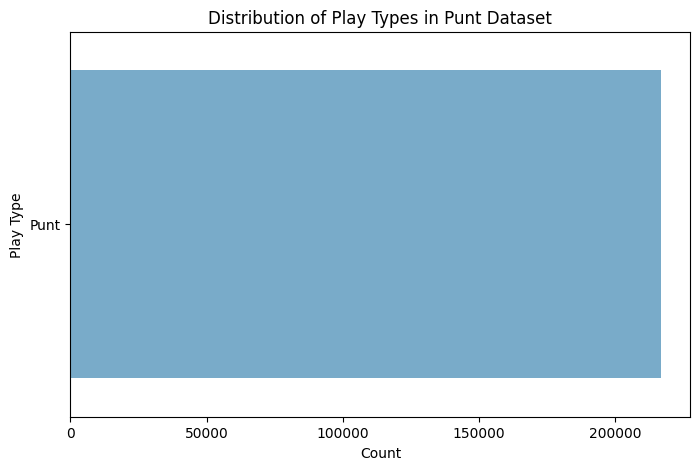

In [63]:
# Univariate Analysis - Play Type Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(y=punt_merged_df["Play_Type"], order=punt_merged_df["Play_Type"].value_counts().index, palette="Blues_r")
plt.title("Distribution of Play Types in Punt Dataset")
plt.xlabel("Count")
plt.ylabel("Play Type")
plt.show()


/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_24001/2884776735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=punt_merged_df["Primary_Impact_Type"].notnull(), palette=["green", "red"])


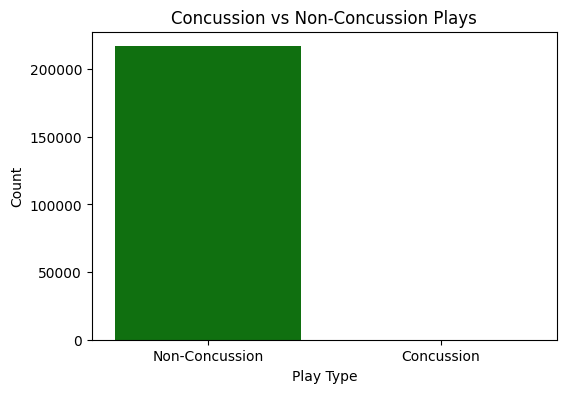

In [64]:
# Concussion vs Non-Concussion Plays
plt.figure(figsize=(6, 4))
sns.countplot(x=punt_merged_df["Primary_Impact_Type"].notnull(), palette=["green", "red"])
plt.title("Concussion vs Non-Concussion Plays")
plt.xticks([0, 1], ["Non-Concussion", "Concussion"])
plt.xlabel("Play Type")
plt.ylabel("Count")
plt.show()


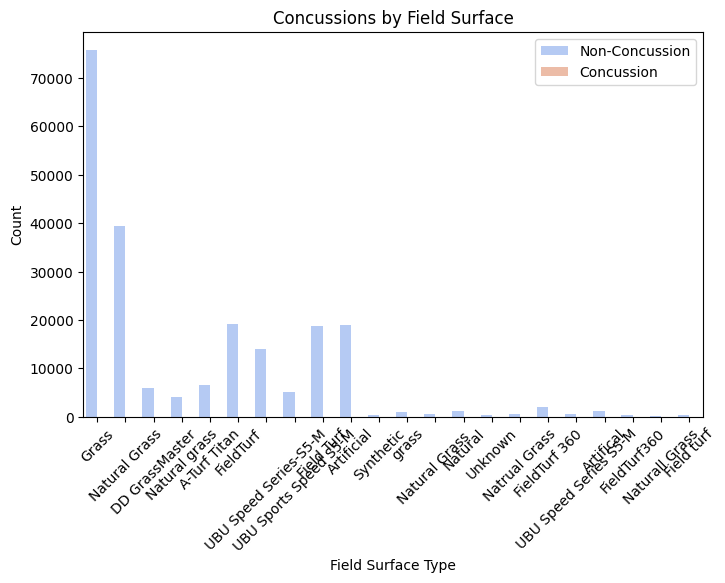

In [65]:
# Fill missing Turf values with "Unknown"
punt_merged_df["Turf"] = punt_merged_df["Turf"].fillna("Unknown")

# Convert concussion indicator to a categorical boolean
punt_merged_df["Concussion"] = punt_merged_df["Primary_Impact_Type"].notnull()

# Field Surface and Concussions
plt.figure(figsize=(8, 5))
sns.countplot(x="Turf", hue="Concussion", data=punt_merged_df, palette="coolwarm")
plt.title("Concussions by Field Surface")
plt.xlabel("Field Surface Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Non-Concussion", "Concussion"])
plt.show()


/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_24001/4215808545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Turf", data=concussion_only_df, palette="Reds")


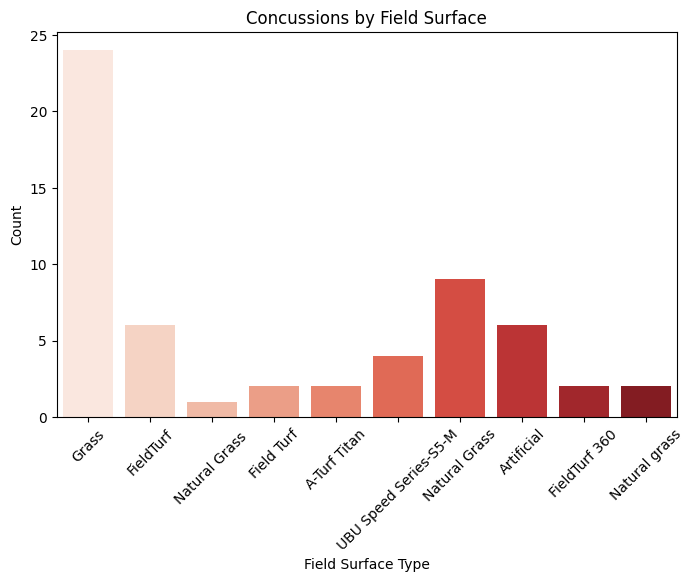

In [66]:
# Filter dataset to include only plays that are in the video review file (which means they are concussion plays)
concussion_only_df = punt_merged_df[punt_merged_df["Primary_Impact_Type"].notnull()]

# Field Surface and Concussions (only showing concussion plays)
plt.figure(figsize=(8, 5))
sns.countplot(x="Turf", data=concussion_only_df, palette="Reds")
plt.title("Concussions by Field Surface")
plt.xlabel("Field Surface Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [67]:
# Summary statistics for concussion-only plays
print("\n### Summary Statistics for Concussion Plays ###")
print(concussion_only_df.describe())



### Summary Statistics for Concussion Plays ###
          GameKey     Week_x       PlayID    Quarter     Week_y  Temperature  \
count   58.000000  58.000000    58.000000  58.000000  58.000000    58.000000   
mean   354.741379   8.275862  2085.086207   2.534483   8.275862    62.724138   
std    178.304545   5.173458  1003.889581   0.902541   5.173458    21.121032   
min      5.000000   1.000000   183.000000   1.000000   1.000000     1.000000   
25%    268.000000   3.000000  1262.000000   2.000000   3.000000    47.250000   
50%    364.000000   6.000000  2274.500000   3.000000   6.000000    65.000000   
75%    497.750000  13.750000  2792.000000   3.000000  13.750000    80.000000   
max    618.000000  16.000000  3746.000000   4.000000  16.000000    90.000000   

       Season_Year        GSISID  
count    58.000000     58.000000  
mean   2016.603448  31197.068966  
std       0.493454   2363.875267  
min    2016.000000  23564.000000  
25%    2016.000000  30171.000000  
50%    2017.000000  

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_24001/2615086764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Quarter", data=concussion_only_df, palette="coolwarm")


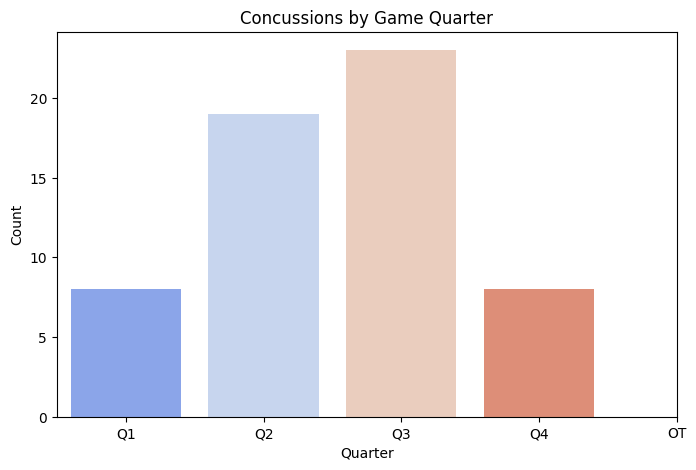

In [68]:
# Concussions by Game Quarter
plt.figure(figsize=(8, 5))
sns.countplot(x="Quarter", data=concussion_only_df, palette="coolwarm")
plt.title("Concussions by Game Quarter")
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3, 4], ["Q1", "Q2", "Q3", "Q4", "OT"])
plt.show()


/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_24001/519176914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Role", data=concussion_only_df, order=concussion_only_df["Role"].value_counts().index, palette="magma")


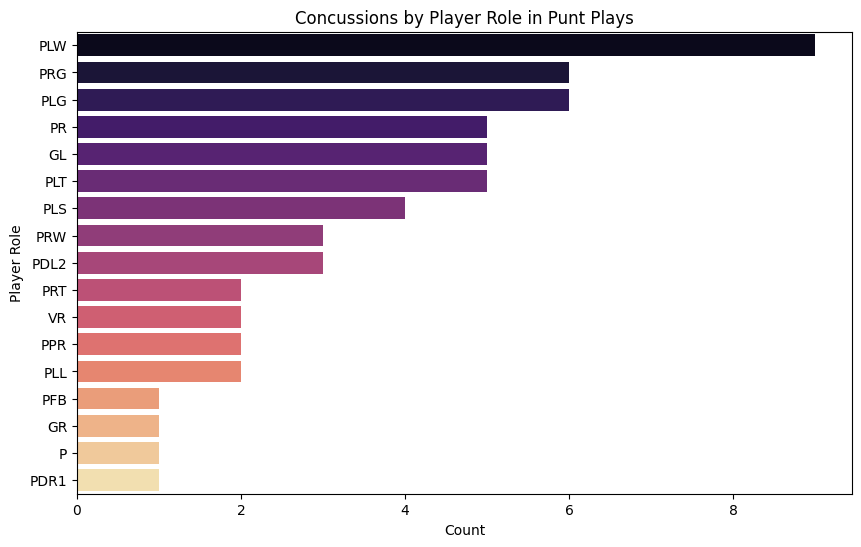

In [69]:
# Concussions by Player Role in Punt Plays
plt.figure(figsize=(10, 6))
sns.countplot(y="Role", data=concussion_only_df, order=concussion_only_df["Role"].value_counts().index, palette="magma")
plt.title("Concussions by Player Role in Punt Plays")
plt.xlabel("Count")
plt.ylabel("Player Role")
plt.show()


/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_24001/3408611487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Primary_Impact_Type", data=concussion_only_df, order=concussion_only_df["Primary_Impact_Type"].value_counts().index, palette="coolwarm")


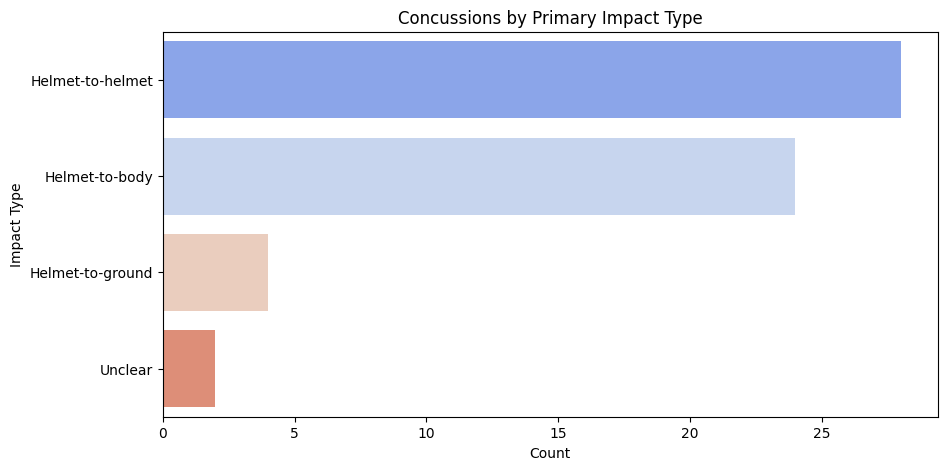

In [70]:
# Concussions by Primary Impact Type
plt.figure(figsize=(10, 5))
sns.countplot(y="Primary_Impact_Type", data=concussion_only_df, order=concussion_only_df["Primary_Impact_Type"].value_counts().index, palette="coolwarm")
plt.title("Concussions by Primary Impact Type")
plt.xlabel("Count")
plt.ylabel("Impact Type")
plt.show()


/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_24001/2274950085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Friendly_Fire", data=concussion_only_df, palette="coolwarm")


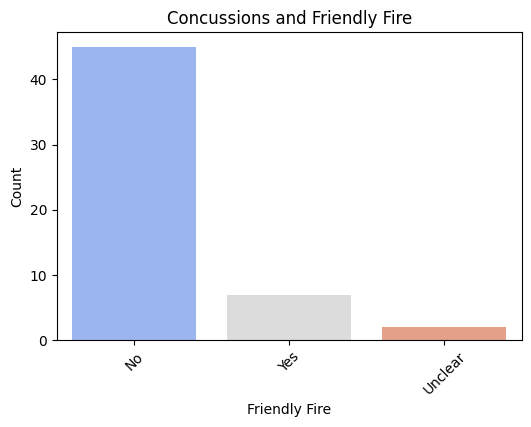

In [71]:
# Concussions and Friendly Fire Relation
plt.figure(figsize=(6, 4))
sns.countplot(x="Friendly_Fire", data=concussion_only_df, palette="coolwarm")
plt.title("Concussions and Friendly Fire")
plt.xlabel("Friendly Fire")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
